# Serialized DLA Sandbox Notebook

## Preliminary Code to Run

In [150]:
using Plots
using BenchmarkTools
using DelimitedFiles
using Distributions
using GLM
using DataFrames
using Polynomials

include("serialized_dla_modules.jl")
include("time_complexity_module.jl")

Main.time_complexity

## Sample DLA Plots

#### Initial State of Walkers

Note that due to the `floor` function operated on the x and y component of the particle's initial positionsm the possible initial states are not centered at 0, 0, and are shifted instead towards the -x direction.

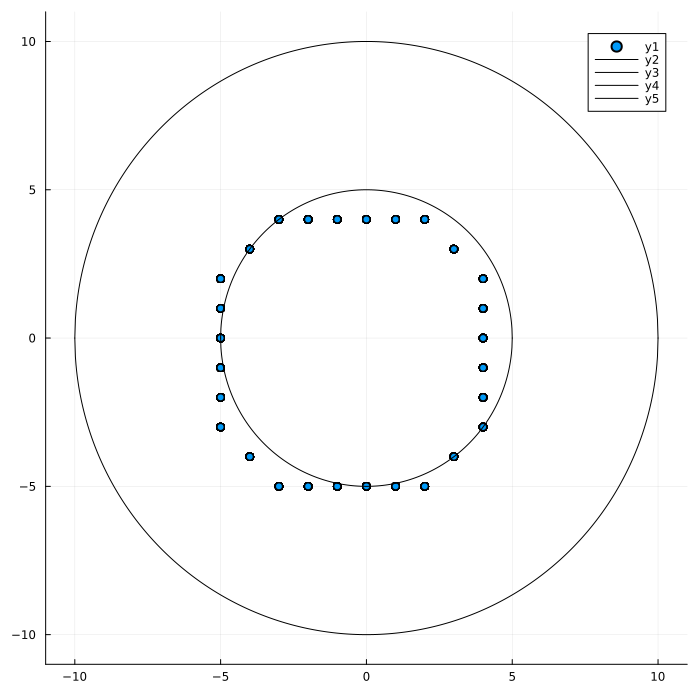

In [6]:
outer_birth_radius = 10.0
inner_birth_radius = 0.5 * outer_birth_radius
particle_number = 10000

walker_ensemble_initial_state = zeros(Float64, (2, particle_number))
for particle in 1:particle_number
    walker_ensemble_initial_state[:, particle] = Random_walker.initialize_randomwalker(inner_birth_radius)
end

#plotting inner and outer birth rings
x_inner_circle = [x for x in range(-1 * inner_birth_radius, inner_birth_radius, 1000)]
x_outer_circle = [x for x in range(-1 * outer_birth_radius, outer_birth_radius, 1000)]

y_inner_circle = (inner_birth_radius^2 .- x_inner_circle.^2).^0.5
y_outer_circle = (outer_birth_radius^2 .- x_outer_circle.^2).^0.5

scatter(walker_ensemble_initial_state[1, :], walker_ensemble_initial_state[2, :],
    xlims = (-1 * outer_birth_radius - 1, outer_birth_radius + 1), 
    ylims = (-1 * outer_birth_radius - 1, outer_birth_radius + 1), size = (700, 700))
plot!(x_inner_circle, y_inner_circle, color = "black")
plot!(x_inner_circle, (-1).* y_inner_circle, color = "black")
plot!(x_outer_circle, y_outer_circle, color = "black")
plot!(x_outer_circle, (-1).*y_outer_circle, color = "black")

#### Sample Random Walk

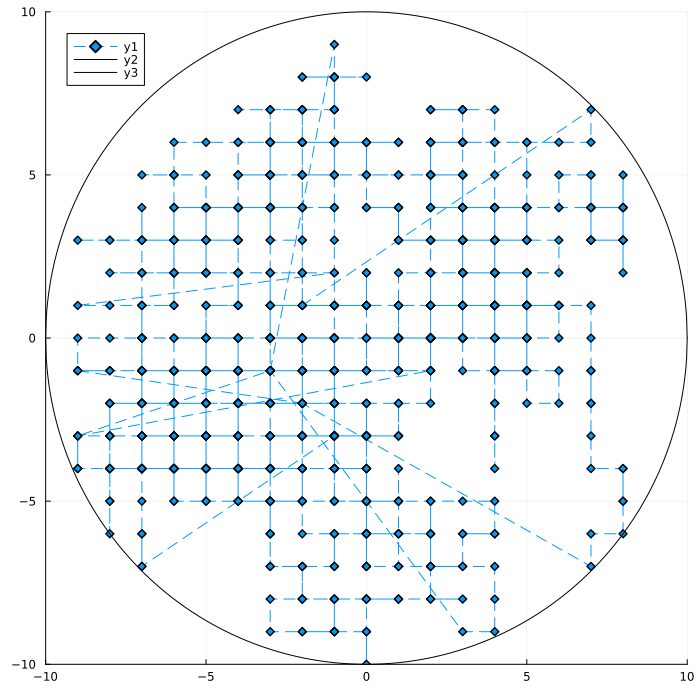

In [7]:
death_radius = 10.0
birth_radius = 0.25 * death_radius
steps = 1000

#creating data points for the death circle
x_points = [x for x in range(-1*death_radius, death_radius, 1000)]
upper_circle_boundary = (death_radius^2 .- x_points.^2).^0.5
lower_circle_boundary = (-1).*upper_circle_boundary


#creating single trajectory for the walker
walker_trajectory = Random_walker.random_walk_generator(steps, death_radius, birth_radius)


#plot of random walk to be saved
plot(walker_trajectory[1, :], walker_trajectory[2, :], xlims = (-1 * death_radius, death_radius), 
            ylims = (-1 * death_radius, death_radius), marker = :d, linestyles = :dash, size = (700, 700))
plot!(x_points, upper_circle_boundary, color = "black")
plot!(x_points, lower_circle_boundary, color = "black")
savefig("image_results/sample_randomwalk.png"); #saving plot


#plot of random walk to be shown in the notebook
plot(walker_trajectory[1, :], walker_trajectory[2, :], xlims = (-1 * death_radius, death_radius), 
            ylims = (-1 * death_radius, death_radius), marker = :d, linestyles = :dash, size = (700, 700))
plot!(x_points, upper_circle_boundary, color = "black")
plot!(x_points, lower_circle_boundary, color = "black")


#### Sample Cluster for $p = 1.0$

In [93]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 1.0

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob);
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done!301.348780 seconds (2.16 G allocations: 228.093 GiB, 20.67% gc time)


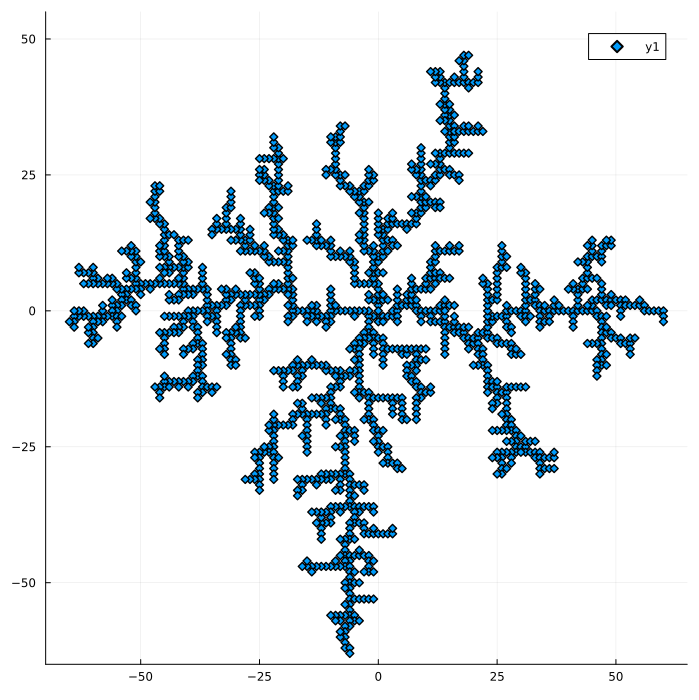

In [97]:
sticking_prob = 1.0
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-70, 65), 
            ylims = (-65, 55), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-70, 65), 
            ylims = (-65, 55), size = (700, 700), marker = :diamond )

#### Sample Cluster for $p = 0.5$

In [10]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 0.5

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob)
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done!240.411387 seconds (2.07 G allocations: 216.165 GiB, 12.61% gc time)


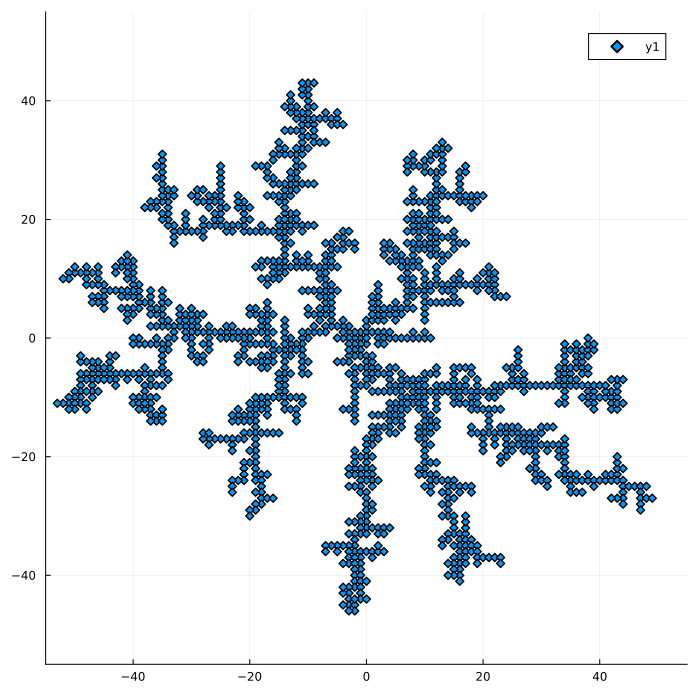

In [22]:
figure_lim = 55
sticking_prob = 0.5
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-1*figure_lim, figure_lim), 
            ylims = (-1*figure_lim, figure_lim), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate for p = $sticking_prob.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-1*figure_lim, figure_lim), 
            ylims = (-1*figure_lim, figure_lim), size = (700, 700), marker = :diamond )

#### Sample Cluster for p = 0.25

In [17]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 0.25

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob)
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done!174.498103 seconds (1.25 G allocations: 128.848 GiB, 14.75% gc time)


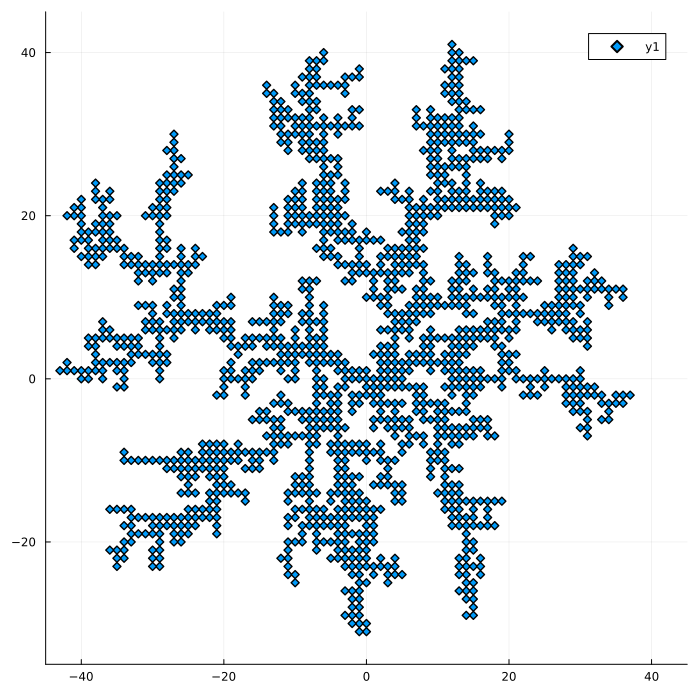

In [89]:
sticking_prob = 0.25
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-45, 45), 
            ylims = (-35, 45), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate for p = $sticking_prob.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-45, 45), 
            ylims = (-35, 45), size = (700, 700), marker = :diamond )

#### Sample Cluster for $p = 0.1$

In [84]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 0.1

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius, sticking_prob)
writedlm("raw_data/cluster aggregate for p = $sticking_prob.txt", cluster_aggregate)

 Walker # 1500 done!122.822586 seconds (932.09 M allocations: 98.602 GiB, 15.23% gc time)


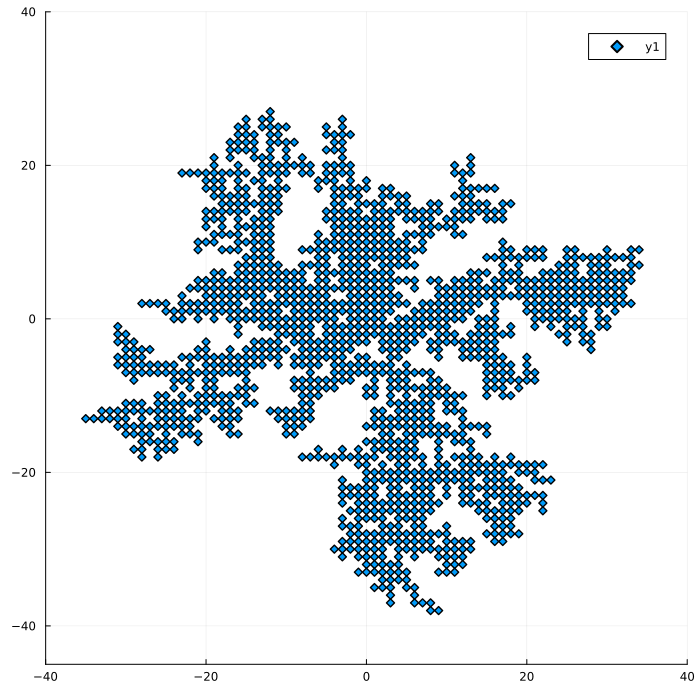

In [85]:
sticking_prob = 0.1
cluster_aggregate = readdlm("raw_data/cluster aggregate for p = $sticking_prob.txt")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-40, 40), 
            ylims = (-45, 40), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate for p = $sticking_prob.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-40, 40), 
            ylims = (-45, 40), size = (700, 700), marker = :diamond )

## Benchmarking Codes

#### Benchmarking for `initialize_randomwalker` function

In [3]:
birth_circle = rand(Uniform(1, 10))

@benchmark Random_walker.initialize_randomwalker($birth_circle)

BenchmarkTools.Trial: 10000 samples with 981 evaluations.
 Range (min … max):  62.997 ns …   5.786 μs  ┊ GC (min … max): 0.00% … 96.85%
 Time  (median):     67.176 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   86.715 ns ± 162.030 ns  ┊ GC (mean ± σ):  7.02% ±  3.97%

  █▅▃▂▁ ▇▃▂  ▃▃▁         ▁                                     ▂
  ████████████████▇██████████▇▇▆▆▆▅▅▆▅▆▄▆▅▄▅▆▅▅▄▅▄▃▃▄▁▄▄▄▆▅▃▄▄ █
  63 ns         Histogram: log(frequency) by time       254 ns <

 Memory estimate: 80 bytes, allocs estimate: 1.

#### Benchmarking for `walker_update_position` function

In [4]:
birth_circle = rand(Uniform(1, 10))
death_circle = rand(Uniform(10, 15))

@benchmark Random_walker.walker_update_position(Random_walker.initialize_randomwalker($birth_circle), $death_circle, $birth_circle)

BenchmarkTools.Trial: 10000 samples with 631 evaluations.
 Range (min … max):  200.317 ns …   8.280 μs  ┊ GC (min … max): 0.00% … 96.12%
 Time  (median):     204.754 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   267.923 ns ± 364.076 ns  ┊ GC (mean ± σ):  8.23% ±  6.19%

  █▅▄▂▁▃▂▁▁▁                                                    ▁
  █████████████▇███████████▇▇▇▇▆▆▆▆▅▅▅▆▅▄▅▅▅▅▄▅▅▄▄▃▃▄▃▂▄▅▄▄▃▄▄▅ █
  200 ns        Histogram: log(frequency) by time        791 ns <

 Memory estimate: 320 bytes, allocs estimate: 4.

#### Benchmarking for `random_walk_generator` function

In [5]:
step_number = 10000
death_radius = rand(Uniform(10, 15))
birth_radius = rand(Uniform(1, 10))

@benchmark Random_walker.random_walk_generator(step_number, $death_radius, $birth_radius)

BenchmarkTools.Trial: 2681 samples with 1 evaluation.
 Range (min … max):  1.440 ms … 30.063 ms  ┊ GC (min … max): 0.00% …  8.55%
 Time  (median):     1.481 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.851 ms ±  1.017 ms  ┊ GC (mean ± σ):  9.49% ± 14.71%

  █▃▂▄▃▁▁▁▁     ▁                    ▂                        
  █████████████████▇▇▅▆▆▅▃▅▄▅▁▄▁▁▅▁▁▅█▅▅▅▄▅▃▃▃▅▄▄▆▃▅▅▆▆▁▅▅▅▆ █
  1.44 ms      Histogram: log(frequency) by time     5.76 ms <

 Memory estimate: 2.45 MiB, allocs estimate: 30069.

#### Benchmarking for `walker_distance_from_cluster` function

In [82]:
particle_number = 1500
cluster_particle_number = 1490
birth_radius = rand(Uniform(0, 20))
cluster_aggregate = rand(Uniform(0, 10), (2, particle_number))


@benchmark Random_walker.walker_distance_from_cluster($cluster_aggregate, 
        $Random_walker.initialize_randomwalker($birth_radius), cluster_particle_number)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):   62.600 μs …  23.261 ms  ┊ GC (min … max):  0.00% … 99.36%
 Time  (median):     125.900 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   146.514 μs ± 609.185 μs  ┊ GC (mean ± σ):  12.91% ±  3.13%

  █        ▃                                                     
  ██▃▂▂▂▂▂▃█▆▄▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  62.6 μs          Histogram: frequency by time          479 μs <

 Memory estimate: 151.81 KiB, allocs estimate: 1497.

#### Benchmarking for `cluster_distance_from_origin` function

In [92]:
particle_number = 1500
cluster_particle_number = 1490
cluster_aggregate = rand(Uniform(0, 10), (2, particle_number))

@benchmark Random_walker.cluster_distance_from_origin($cluster_aggregate, cluster_particle_number)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):   61.900 μs …  32.855 ms  ┊ GC (min … max):  0.00% … 99.49%
 Time  (median):     127.400 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   162.834 μs ± 718.648 μs  ┊ GC (mean ± σ):  11.94% ±  2.81%

  █      ▆▅                                                      
  ██▄▄▄▄▄██▇▅▅▄▃▃▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂ ▃
  61.9 μs          Histogram: frequency by time          564 μs <

 Memory estimate: 151.70 KiB, allocs estimate: 1493.

## Plotting Elapsed Time

In [38]:
particle_number = 1500
maximum_radius = 100.0
sticking_prob = 0.1
N_points = 10

# serial_time = time_complexity.run_time(particle_number,maximum_radius,sticking_prob,N_points)

10

In [42]:
serial_time = readdlm("raw_data/serial_time for up to particle_number = $particle_number.txt")

serial_time_stats = time_complexity.run_time_stats(serial_time)

10×3 Matrix{Float64}:
  150.0   0.0528155  0.0173961
  300.0   0.348658   0.102542
  450.0   0.828124   0.220697
  600.0   1.32141    0.472552
  750.0   2.79637    0.803798
  900.0   4.47038    0.694478
 1050.0   9.04973    3.51032
 1200.0  15.6498     3.98566
 1350.0  18.7979     5.07368
 1500.0  25.479      3.73788

In [151]:
x_stats = serial_time_stats[:,1]
y_stats = serial_time_stats[:,2]
se = serial_time_stats[:,3]
data = DataFrame(x = x_stats, y = y_stats)
model = lm(@formula(y ~ x), data)
intercept, slope = coef(model)

y_best = intercept .+ slope .* x_stats
scatter(x_stats, y_stats, yerror=se, label = "Data", xlabel = "Particle Number", ylabel = "Elapsed Time (s)", title = "Time Complexity")
plot!(x_stats, y_best, label = "Best Fit Line", lw = 2)

In [148]:
x_stats = (serial_time_stats[:,1])
y_stats = (serial_time_stats[:,2])
se = (serial_time_stats[:,3])
scatter(x_stats, y_stats, yerror=se, label = "Data", xlabel = "Particle Number", ylabel = "Elapsed Time (s)", title = "Time Complexity")
# scatter(x_stats, y_stats, yerror=se, scale=:log10, label = "Data", xlabel = "Particle Number", ylabel = "Elapsed Time (s)", title = "Time Complexity")

In [145]:
y_best = Polynomials.fit(x_stats,y_stats,2)
scatter(x_stats, y_stats, yerror=se, label = "Data", xlabel = "Particle Number", ylabel = "Elapsed Time (s)", title = "Time Complexity")
# plot!(y_best, label = "Best Fit Line", xlims=[0,1600], lw = 2)